Mental Disorder Classification using EDA

Importing Libraries for EDA

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
    

Data Collection


In [191]:
data = pd.read_csv('./Dataset-Mental-Disorders.csv')


Data Preprocessing


In [192]:
data.head()

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


In [193]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Patient Number       120 non-null    object
 1   Sadness              120 non-null    object
 2   Euphoric             120 non-null    object
 3   Exhausted            120 non-null    object
 4   Sleep dissorder      120 non-null    object
 5   Mood Swing           120 non-null    object
 6   Suicidal thoughts    120 non-null    object
 7   Anorxia              120 non-null    object
 8   Authority Respect    120 non-null    object
 9   Try-Explanation      120 non-null    object
 10  Aggressive Response  120 non-null    object
 11  Ignore & Move-On     120 non-null    object
 12  Nervous Break-down   120 non-null    object
 13  Admit Mistakes       120 non-null    object
 14  Overthinking         120 non-null    object
 15  Sexual Activity      120 non-null    object
 16  Concentr

In [194]:
data.shape

(120, 19)

Checking for NULL values

In [195]:
data.isnull().sum()

Patient Number         0
Sadness                0
Euphoric               0
Exhausted              0
Sleep dissorder        0
Mood Swing             0
Suicidal thoughts      0
Anorxia                0
Authority Respect      0
Try-Explanation        0
Aggressive Response    0
Ignore & Move-On       0
Nervous Break-down     0
Admit Mistakes         0
Overthinking           0
Sexual Activity        0
Concentration          0
Optimisim              0
Expert Diagnose        0
dtype: int64

We do not require the Patient Number column as it is not being used.

In [196]:
data.drop(columns='Patient Number',inplace=True)

In [197]:
print(data['Sexual Activity'].unique(),
      data['Concentration'].unique(),
      data['Optimisim'].unique())

['3 From 10' '4 From 10' '6 From 10' '5 From 10' '7 From 10' '8 From 10'
 '9 From 10' '2 From 10' '1 From 10'] ['3 From 10' '2 From 10' '5 From 10' '4 From 10' '7 From 10' '6 From 10'
 '1 From 10' '8 From 10'] ['4 From 10' '5 From 10' '7 From 10' '2 From 10' '6 From 10' '9 From 10'
 '3 From 10' '8 From 10' '1 From 10']


We can see that the values are a range and all lie from 1-10 hence we can only keep the values in the column

In [198]:
for i in range(data.shape[0]):
    data.loc[i]['Sexual Activity'] = data.loc[i]['Sexual Activity'][0]
    data.loc[i]['Concentration'] = data.loc[i]['Concentration'][0]
    data.loc[i]['Optimisim'] = data.loc[i]['Optimisim'][0]

In [199]:
data['Sexual Activity'] = pd.to_numeric(data['Sexual Activity'])
data['Concentration'] = pd.to_numeric(data['Concentration'])
data['Optimisim'] = pd.to_numeric(data['Optimisim'])

In [200]:
data.rename(columns={'Sleep dissorder':'Sleep disorder','Anorxia':'Anorexia'})

,Sadness,Euphoric,Exhausted,Sleep disorder,Mood Swing,Suicidal thoughts,Anorexia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3,3,4,Bipolar Type-2
1,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4,2,5,Depression
2,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6,5,7,Bipolar Type-1
3,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3,2,2,Bipolar Type-2
4,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5,5,6,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Most-Often,Seldom,Usually,Sometimes,NO,YES,NO,NO,YES,NO,YES,NO,NO,YES,2,5,3,Depression
116,Sometimes,Sometimes,Sometimes,Seldom,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,6,7,8,Bipolar Type-1
117,Usually,Sometimes,Usually,Sometimes,YES,NO,YES,YES,NO,NO,NO,YES,NO,YES,1,5,3,Bipolar Type-2
118,Usually,Sometimes,Seldom,Seldom,NO,YES,YES,NO,YES,YES,YES,NO,YES,YES,7,7,7,Depression


Data Visualization


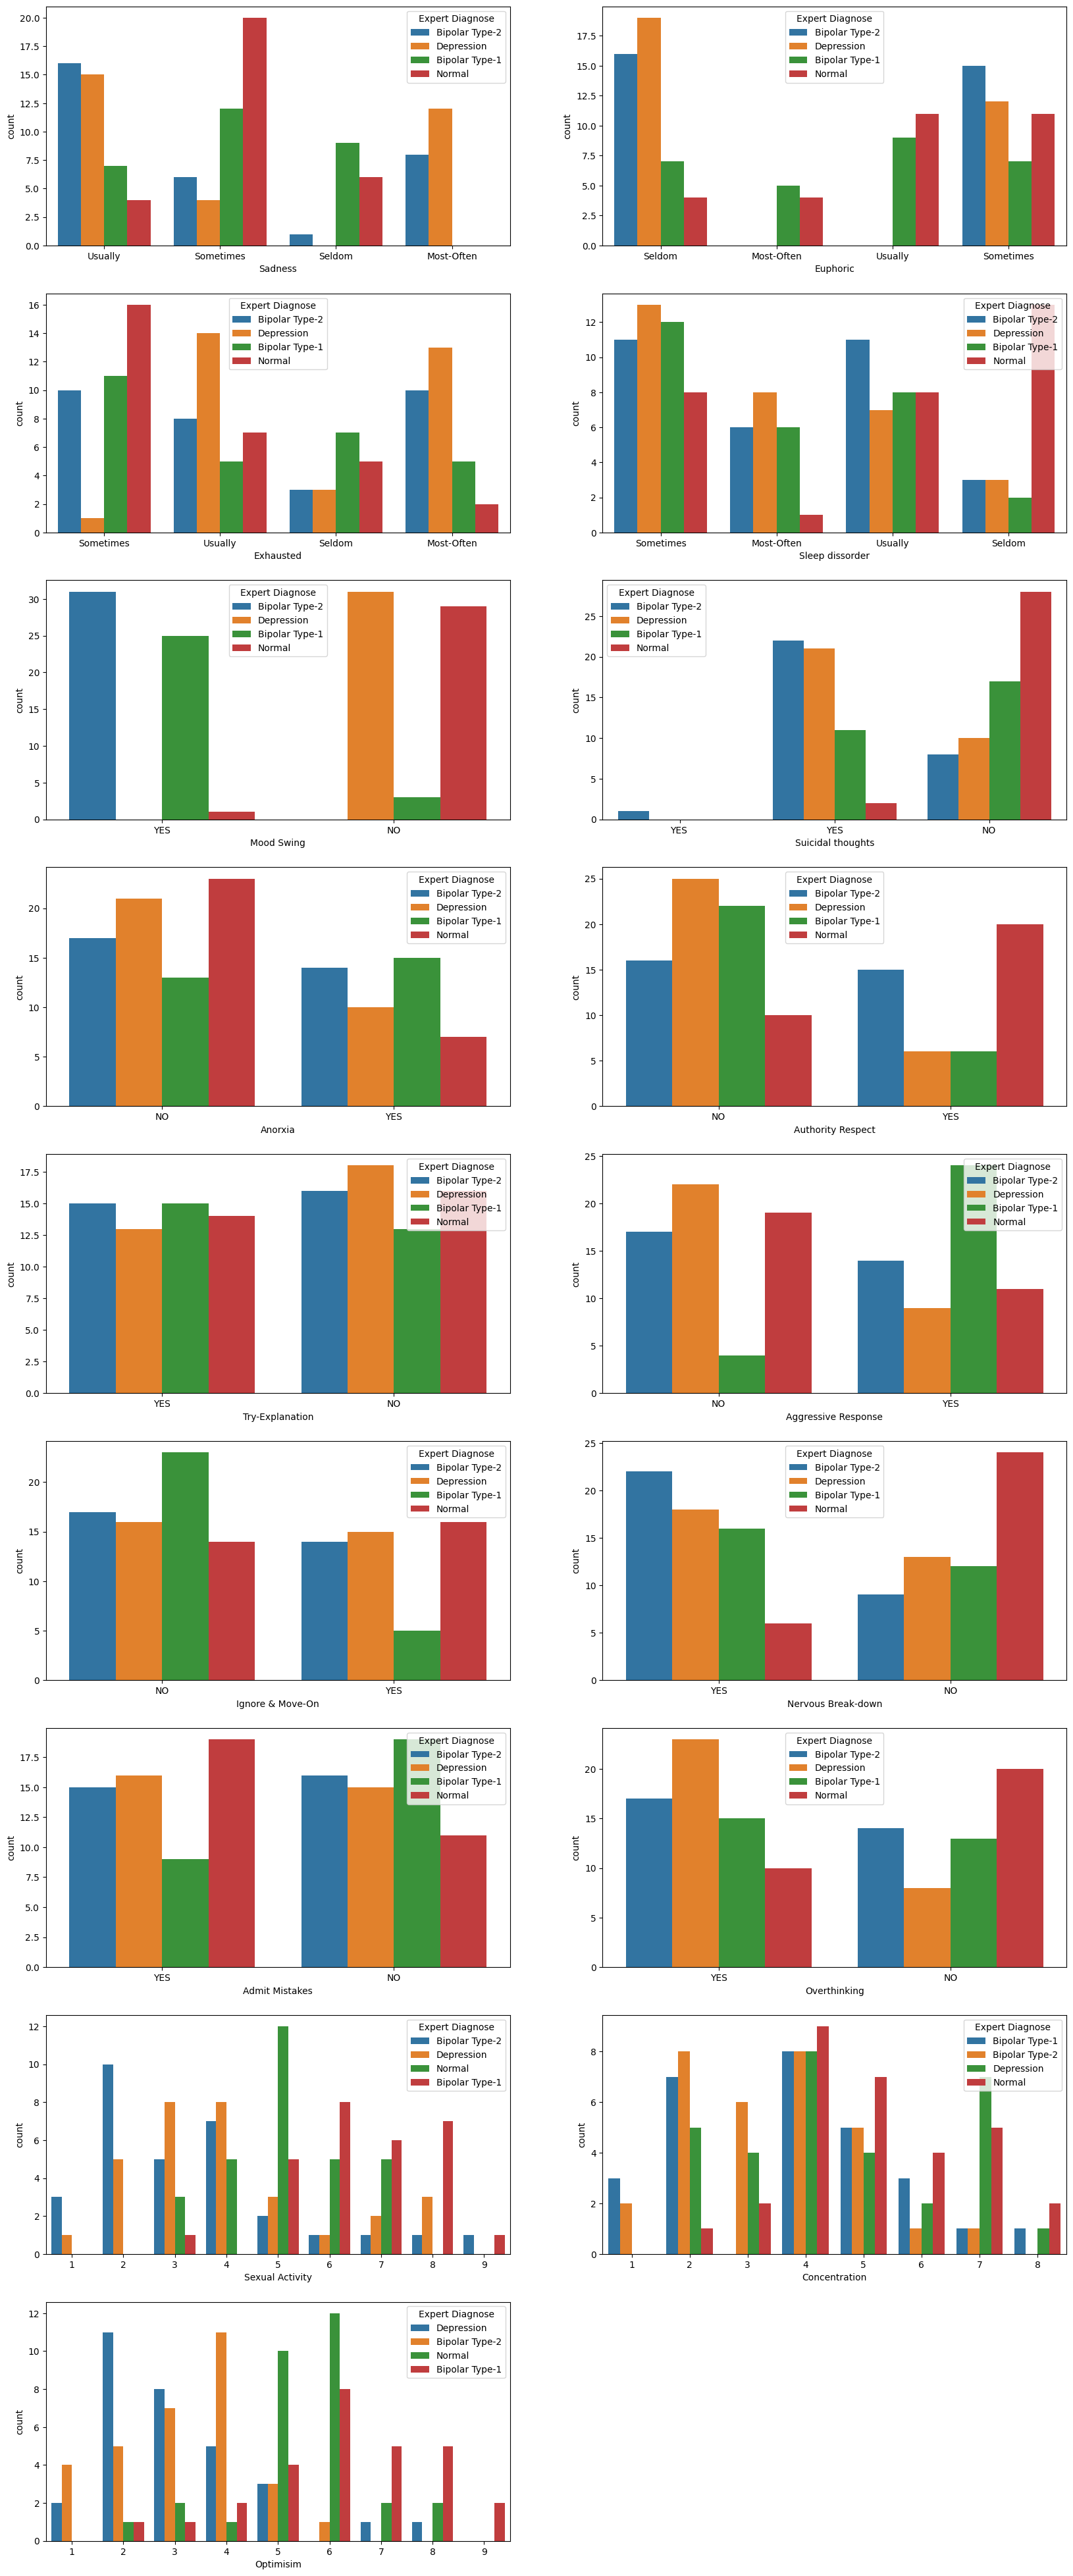

In [201]:
i=0
plt.figure(figsize=(20,50))
for col in data.drop(columns='Expert Diagnose').columns:
    i=i+1
    plt.subplot(9,2,i)
    sns.countplot(data,x=col,hue='Expert Diagnose')
    

Hence we have used Matplot and Seaborn to perform EDA on the Mental Disorder Classification dataset. 
We discover the counts of patients with respect to each symptom and see which disorder best lies with their case.
Hence we can draw the following inference from this - 
* People who are Never Sad and Sometimes Euphoric tend to exhibit Bipolar Type 2
* People who are usually exhausted are depressed, those who are never exhausted are Bipolar Type 1, and those who are sometimes exhausted are Normal
* People who are lacking sleep are most often depressed 
* We also see that people with low concentration levels are Bipolar Type 2 and the people with high concentration levels are seen as depressed.
* People who are highly optimistic are Bipolar type 1 and the people who tend to unoptimistic are depressed

Note - These inferences are only based on the dataset and may or may not be fully accurate.

In [202]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [203]:
data.head()

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3,3,4,Bipolar Type-2
1,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4,2,5,Depression
2,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6,5,7,Bipolar Type-1
3,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3,2,2,Bipolar Type-2
4,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5,5,6,Normal


In [204]:
newdata=data.copy()
encode = ['Sadness', 'Euphoric', 'Exhausted', 'Sleep dissorder', 'Mood Swing',
       'Suicidal thoughts', 'Anorxia', 'Authority Respect', 'Try-Explanation',
       'Aggressive Response', 'Ignore & Move-On', 'Nervous Break-down',
       'Admit Mistakes', 'Overthinking','Expert Diagnose']
newdata[encode] = newdata[encode].apply(le.fit_transform)
newdata

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,3,1,2,2,1,2,0,0,1,0,0,1,1,1,3,3,4,1
1,3,1,3,2,0,1,0,0,0,0,0,0,0,0,4,2,5,2
2,2,0,2,2,1,0,0,0,1,1,0,1,1,0,6,5,7,0
3,3,1,3,0,1,1,1,0,1,0,0,0,0,0,3,2,2,1
4,3,3,2,2,0,0,0,0,0,0,0,1,1,1,5,5,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0,1,3,2,0,1,0,0,1,0,1,0,0,1,2,5,3,2
116,2,2,2,1,1,0,0,0,0,1,0,0,0,1,6,7,8,0
117,3,2,3,2,1,0,1,1,0,0,0,1,0,1,1,5,3,1
118,3,2,1,1,0,1,1,0,1,1,1,0,1,1,7,7,7,2


In [205]:
x=newdata.drop('Expert Diagnose',axis='columns')
y=newdata['Expert Diagnose']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=30)

In [206]:
from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier


In [207]:
LogR = LogisticRegression(random_state=1234,multi_class='multinomial')
LogR.fit(x_train,y_train)

# rf=RandomForestClassifier(n_estimators=100,random_state=42)
# rf.fit(x_train,y_train)

LogisticRegression(multi_class='multinomial', random_state=1234)

In [208]:
# ypred = rf.predict(x_test)
ypred=LogR.predict(x_test)

In [209]:
print("Accuracy Score",accuracy_score(y_test,ypred))

Accuracy Score 0.6666666666666666


In [210]:
clfr = classification_report(ypred,y_test)
print(clfr)

              precision    recall  f1-score   support

           0       0.56      1.00      0.71         5
           1       0.83      0.83      0.83        12
           2       0.75      0.50      0.60        12
           3       0.43      0.43      0.43         7

    accuracy                           0.67        36
   macro avg       0.64      0.69      0.64        36
weighted avg       0.69      0.67      0.66        36



In [211]:
cm = confusion_matrix(y_test, ypred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[ 5  1  1  2]
 [ 0 10  2  0]
 [ 0  0  6  2]
 [ 0  1  3  3]]


<Axes: title={'center': 'Feature Importance'}>

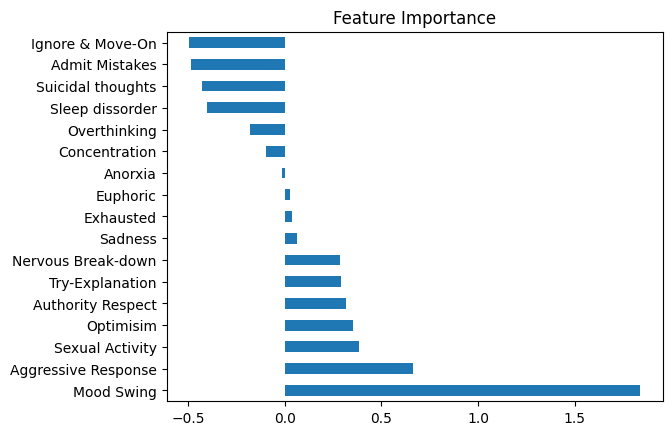

In [212]:
# feature_importances = pd.Series(rf.feature_importances_, index=x.columns)
# feature_importances.nlargest(10).plot(kind='barh')

importance = LogR.coef_[0]
feat_importances = pd.Series(importance,index=x.columns)
feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance')